# CROP CLASSIFICATION

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier, Pool, metrics, cv
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, Conv1D, MaxPooling1D, AveragePooling1D, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Data loading and Preprocessing

In [2]:
data_train1 = pd.read_csv(f'D:/Master/II godina/Large Scale Data Mining/Projekat/Data/train data/20210926.csv')
data_train2 = pd.read_csv(f'D:/Master/II godina/Large Scale Data Mining/Projekat/Data/train data/20210807.csv')
data_train3 = pd.read_csv(f'D:/Master/II godina/Large Scale Data Mining/Projekat/Data/train data/20210708.csv')
data_train4 = pd.read_csv(f'D:/Master/II godina/Large Scale Data Mining/Projekat/Data/train data/20210509.csv')
data_train5 = pd.read_csv(f'D:/Master/II godina/Large Scale Data Mining/Projekat/Data/train data/20210223.csv')
data_train6 = pd.read_csv(f'D:/Master/II godina/Large Scale Data Mining/Projekat/Data/train data/20210409.csv')
data_train7 = pd.read_csv(f'D:/Master/II godina/Large Scale Data Mining/Projekat/Data/train data/20210424.csv')
data_train8 = pd.read_csv(f'D:/Master/II godina/Large Scale Data Mining/Projekat/Data/train data/20210504.csv')

data_labels = pd.read_csv(f'D:/Master/II godina/Large Scale Data Mining/Projekat/Data/train data/train_data_labells.csv')

In [3]:
data_all_train = data_train1.merge(data_train2, how='left', on='Id')
data_all_train = data_all_train.merge(data_train3, how='left', on='Id')
data_all_train = data_all_train.merge(data_train4, how='left', on='Id')
data_all_train = data_all_train.merge(data_train5, how='left', on='Id')
data_all_train = data_all_train.merge(data_train6, how='left', on='Id')
data_all_train = data_all_train.merge(data_train7, how='left', on='Id')
data_all_train = data_all_train.merge(data_train8, how='left', on='Id')
data_all_train = data_all_train.merge(data_labels, how='left', on='Id')

In [4]:
data_all_train = data_all_train.drop(data_all_train.columns[0], axis=1)
data_all_train = data_all_train.drop(data_all_train.columns[-1], axis=1)

In [90]:
data_all_train.head()

,B01,B02,B03,B04,B05,B06,B07,B08,B8A,B09,B11,B12,classId
0,334.0,380.0,519.0,522.0,897.0,1522.0,1754.0,1782.0,1986.0,2033.0,1953.0,1275.0,13.0
1,334.0,366.0,551.0,501.0,897.0,1522.0,1754.0,1932.0,1986.0,2033.0,1953.0,1275.0,13.0
2,334.0,404.0,554.0,539.0,1001.0,1516.0,1753.0,1842.0,1982.0,2033.0,2083.0,1415.0,13.0
3,334.0,381.0,545.0,501.0,1001.0,1516.0,1753.0,1802.0,1982.0,2033.0,2083.0,1415.0,13.0
4,334.0,395.0,539.0,479.0,897.0,1522.0,1754.0,1844.0,1986.0,2033.0,1953.0,1275.0,13.0


In [5]:
data_test1 = pd.read_csv(f'D:/Master/II godina/Large Scale Data Mining/Projekat/Data/test data/20210926.csv')
data_test2 = pd.read_csv(f'D:/Master/II godina/Large Scale Data Mining/Projekat/Data/test data/20210807.csv')
data_test3 = pd.read_csv(f'D:/Master/II godina/Large Scale Data Mining/Projekat/Data/test data/20210708.csv')
data_test4 = pd.read_csv(f'D:/Master/II godina/Large Scale Data Mining/Projekat/Data/test data/20210509.csv')
data_test5 = pd.read_csv(f'D:/Master/II godina/Large Scale Data Mining/Projekat/Data/test data/20210223.csv')
data_test6 = pd.read_csv(f'D:/Master/II godina/Large Scale Data Mining/Projekat/Data/test data/20210409.csv')
data_test7 = pd.read_csv(f'D:/Master/II godina/Large Scale Data Mining/Projekat/Data/test data/20210424.csv')
data_test8 = pd.read_csv(f'D:/Master/II godina/Large Scale Data Mining/Projekat/Data/test data/20210504.csv')

In [6]:
data_test = data_test1.merge(data_test2, how='left', on='Id')
data_test = data_test.merge(data_test3, how='left', on='Id')
data_test = data_test.merge(data_test4, how='left', on='Id')
data_test = data_test.merge(data_test5, how='left', on='Id')
data_test = data_test.merge(data_test6, how='left', on='Id')
data_test = data_test.merge(data_test7, how='left', on='Id')
data_test = data_test.merge(data_test8, how='left', on='Id')

In [7]:
data_test = data_test.drop(data_test.columns[0], axis=1)

In [93]:
data_test.head()

,B01,B02,B03,B04,B05,B06,B07,B08,B8A,B09,B11,B12
0,340.0,455.0,624.0,777.0,1124.0,1246.0,1388.0,1222.0,1623.0,1714.0,2550.0,2168.0
1,228.0,356.0,600.0,440.0,812.0,1993.0,2602.0,3602.0,2742.0,3574.0,1867.0,1443.0
2,207.0,367.0,466.0,719.0,862.0,975.0,1096.0,1228.0,1323.0,1362.0,2171.0,1781.0
3,460.0,565.0,809.0,838.0,1301.0,1958.0,2169.0,2230.0,2438.0,2375.0,2928.0,2269.0
4,437.0,904.0,1130.0,1288.0,1491.0,1723.0,1853.0,1722.0,1949.0,2154.0,2602.0,2235.0


Text(0, 0.5, 'Missing Value Count')

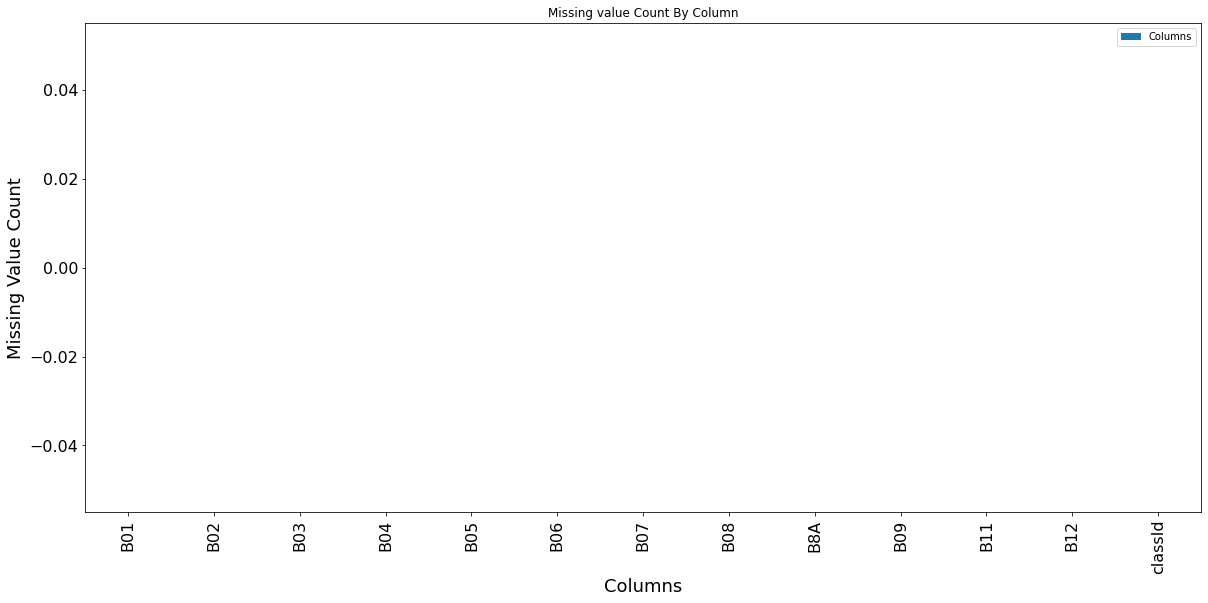

In [107]:
# Check Missing values for data train
x = data_all_train.isna().sum().to_frame()
x.columns = ["Columns"]
x.plot.bar(rot = 90, figsize = (20,9), title = "Missing value Count By Column", fontsize=16)
plt.xlabel("Columns", fontsize = 18)
plt.ylabel("Missing Value Count", fontsize = 18)

Text(0, 0.5, 'Missing Value Count')

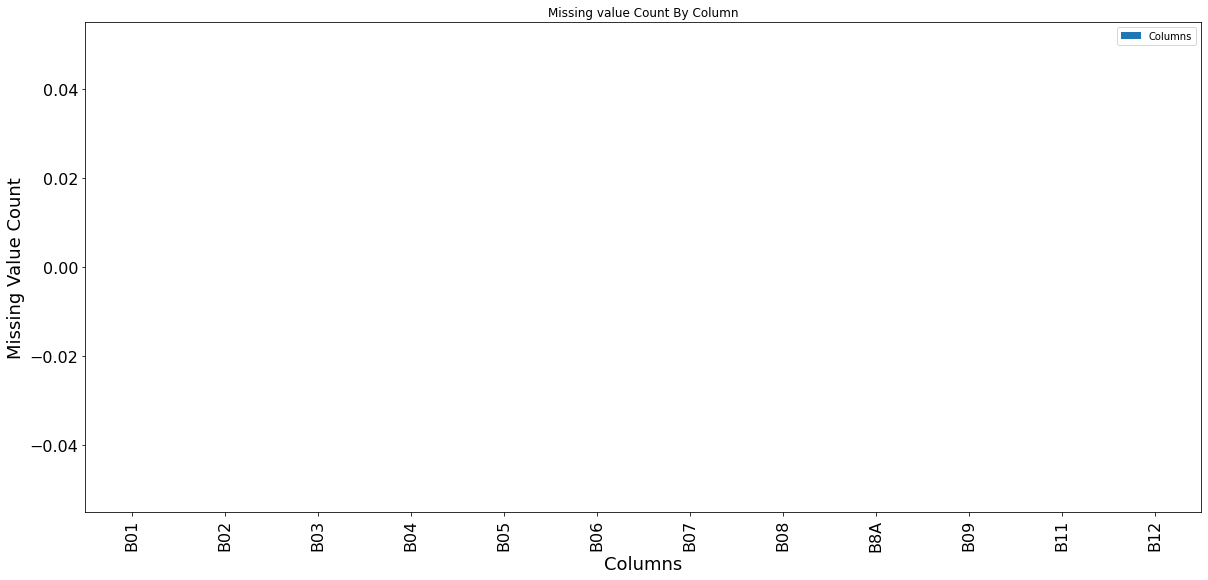

In [108]:
# Check Missing values for data test
x = data_test.isna().sum().to_frame()
x.columns = ["Columns"]
x.plot.bar(rot = 90, figsize=(20,9), title = "Missing value Count By Column", fontsize = 16)
plt.xlabel("Columns", fontsize = 18)
plt.ylabel("Missing Value Count", fontsize=18)

In [94]:
data_all_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000001 entries, 0 to 1000000
Data columns (total 13 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   B01      1000001 non-null  float64
 1   B02      1000001 non-null  float64
 2   B03      1000001 non-null  float64
 3   B04      1000001 non-null  float64
 4   B05      1000001 non-null  float64
 5   B06      1000001 non-null  float64
 6   B07      1000001 non-null  float64
 7   B08      1000001 non-null  float64
 8   B8A      1000001 non-null  float64
 9   B09      1000001 non-null  float64
 10  B11      1000001 non-null  float64
 11  B12      1000001 non-null  float64
 12  classId  1000001 non-null  float64
dtypes: float64(13)
memory usage: 106.8 MB


In [97]:
data_all_train['classId'].unique()

array([13.,  1.,  6.,  8.,  0.,  2.,  7.,  5., 11.,  4.,  3.])

In [98]:
data_all_train['classId'].value_counts()

0.0     259769
1.0     236965
3.0     120126
6.0     105454
2.0      89531
7.0      72328
4.0      49444
8.0      31201
11.0     29632
5.0       4567
13.0       984
Name: classId, dtype: int64

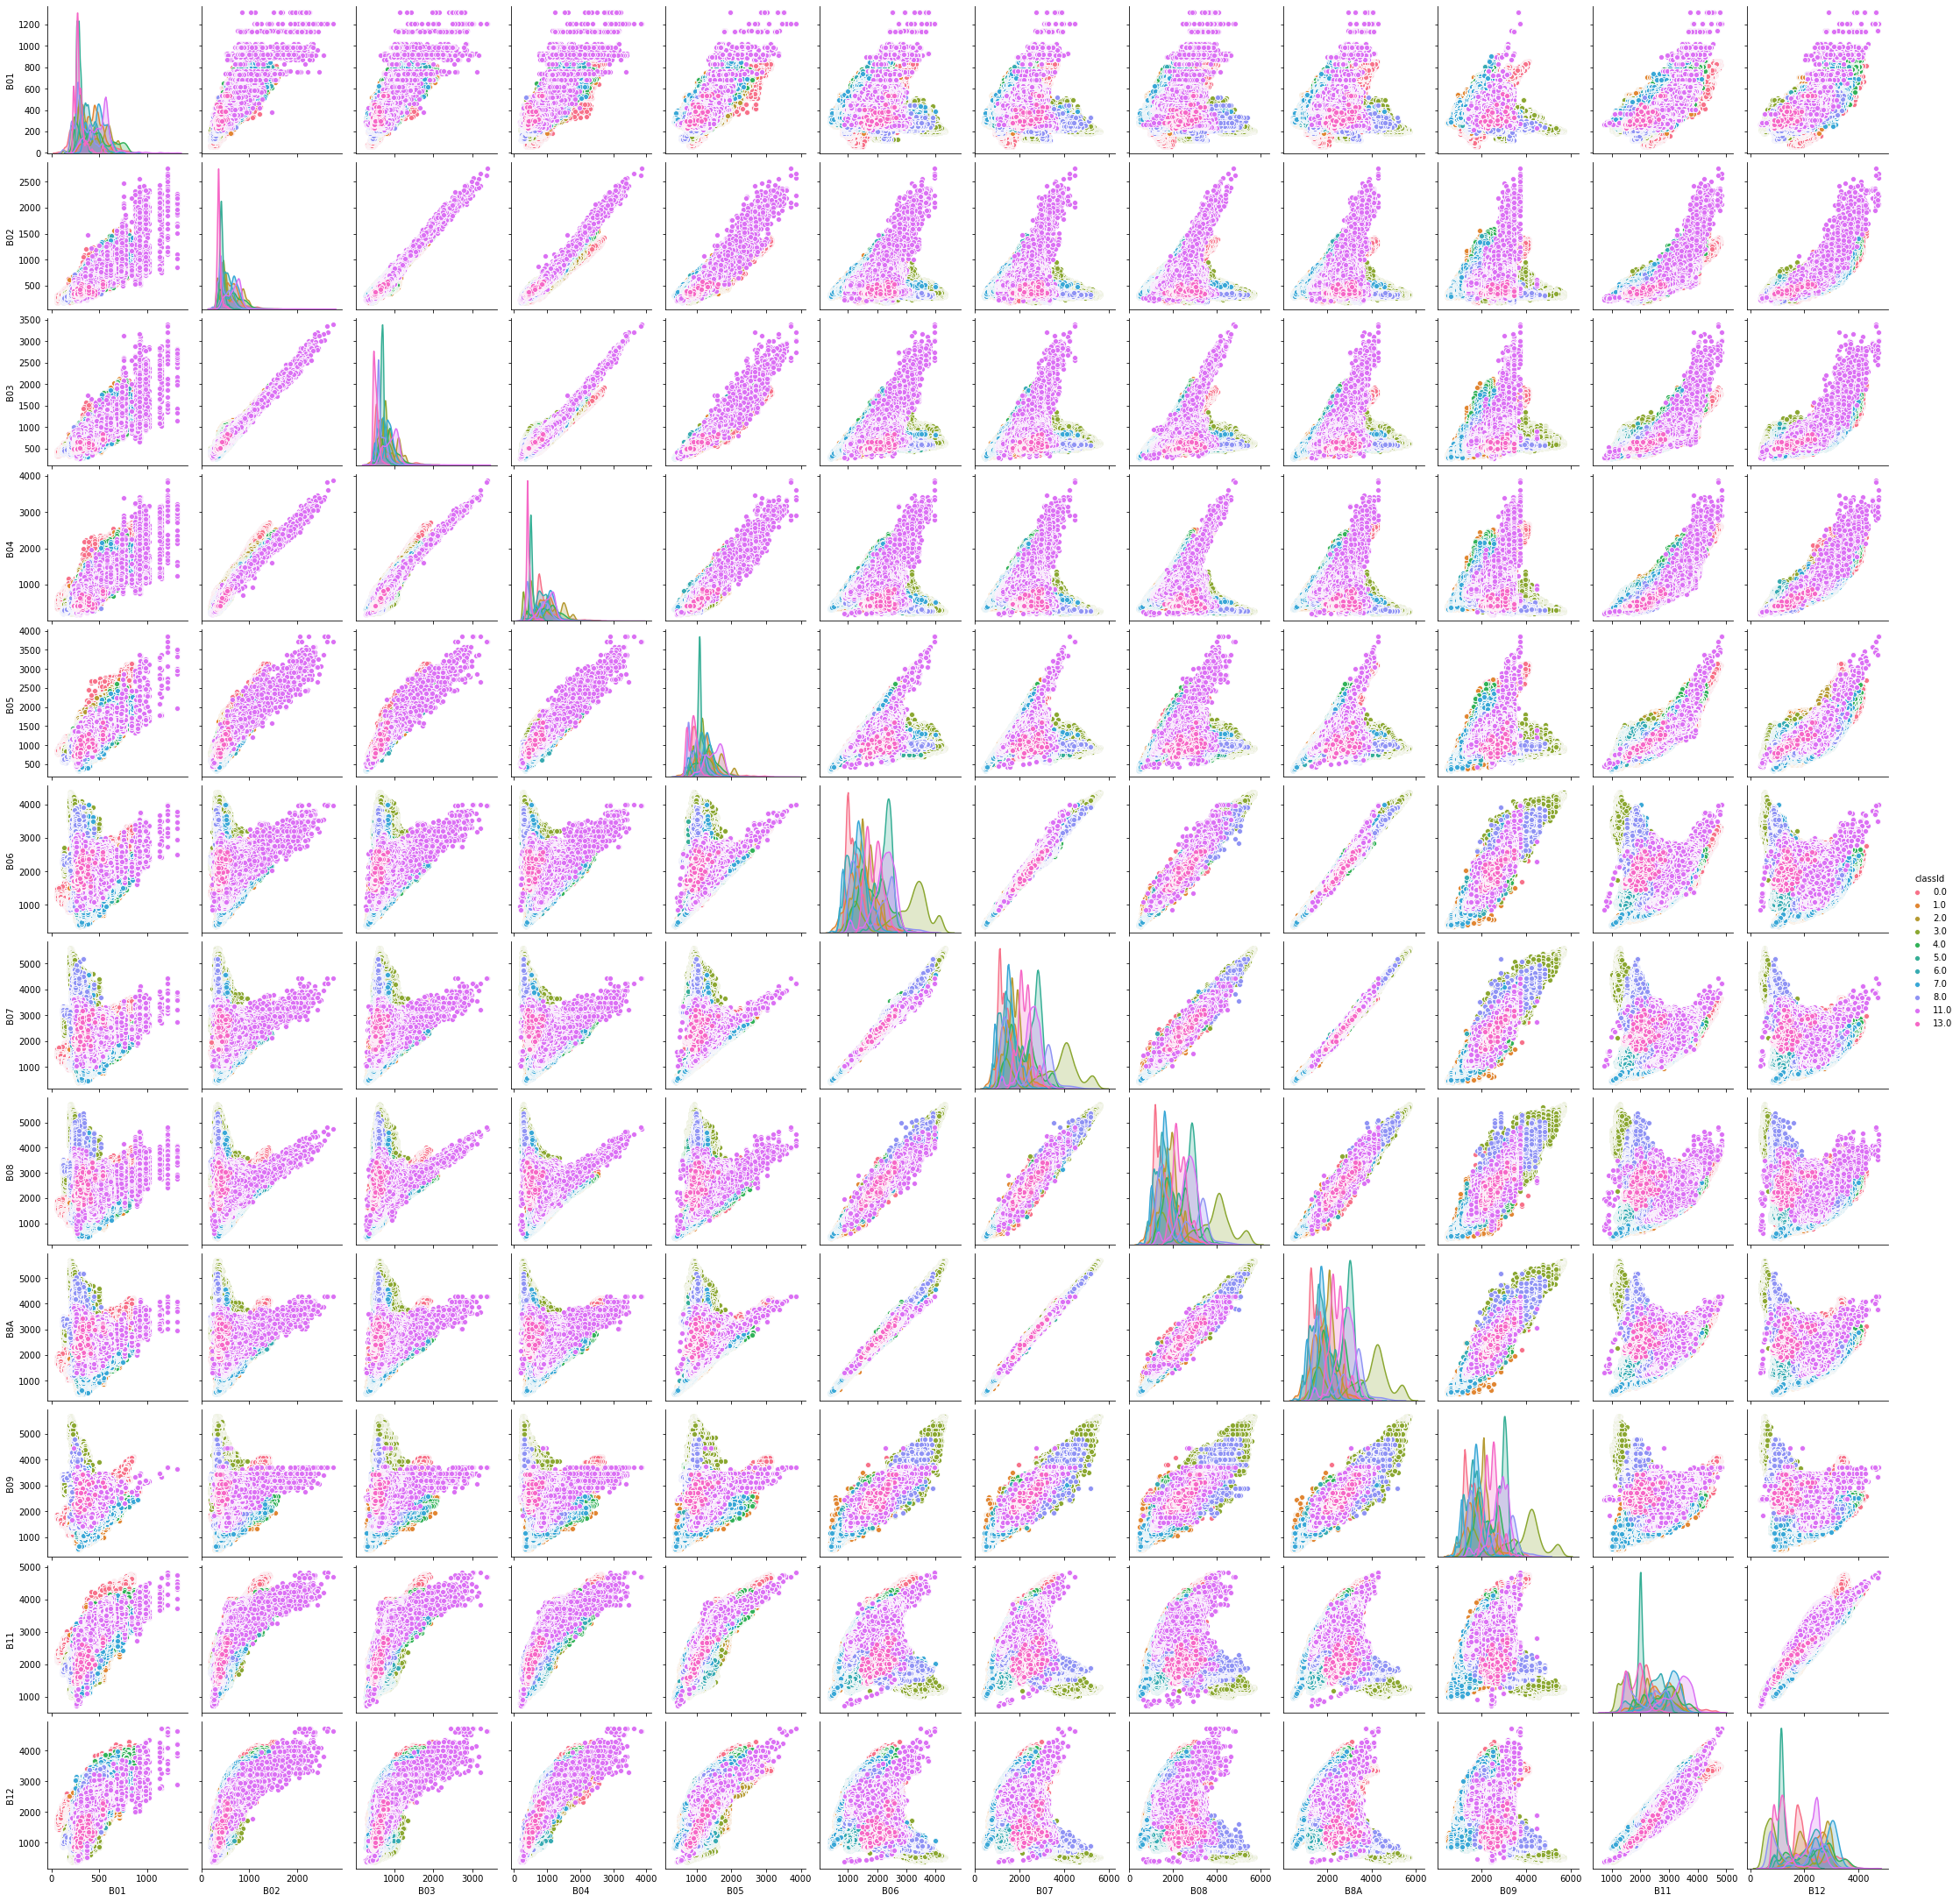

In [99]:
sns.pairplot(data_all_train, hue = 'classId')

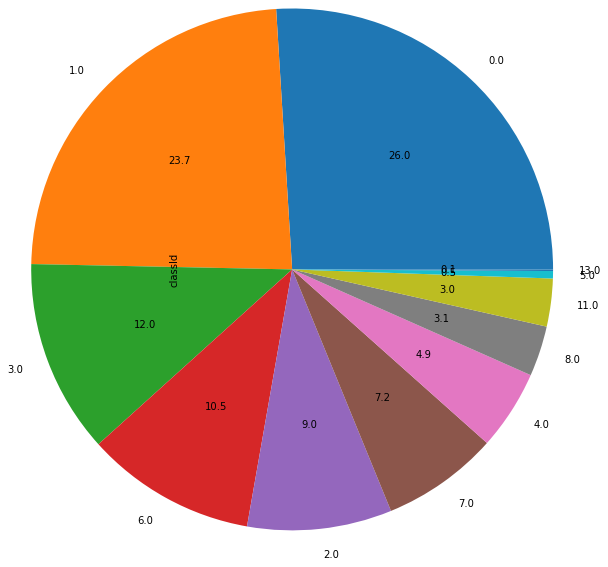

In [101]:
df1=data_all_train["classId"].value_counts()
df1.plot(radius = 3, kind = "pie", autopct = "%1.1f", pctdistance = 0.6)
plt.tick_params(labelsize = 10)

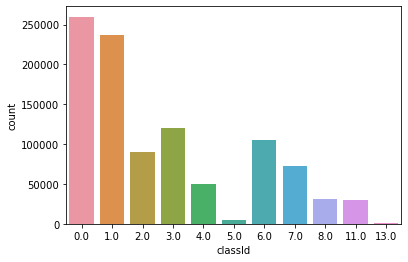

In [106]:
g = sns.countplot(Y)

In [10]:
X = data_all_train.drop(["classId"], axis = 1)
Y = data_all_train["classId"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 42, test_size = 0.25)

# RANDOM FOREST, NAIVE BAYES and KNN

In [ ]:
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X_train, y_train)
y_pred = clf.predict(data_test)

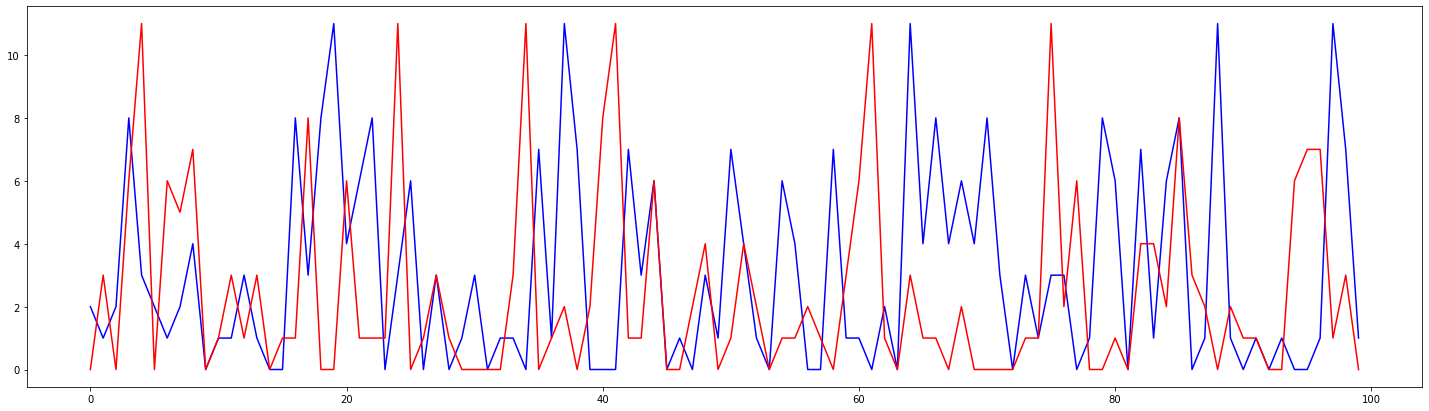

In [135]:
plt.figure(figsize = (25,7))
plt.plot(range(100),y_train[100:200],color='b')
plt.plot(range(100),y_pred[100:200],color='r')
plt.show()

In [64]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(data_test)

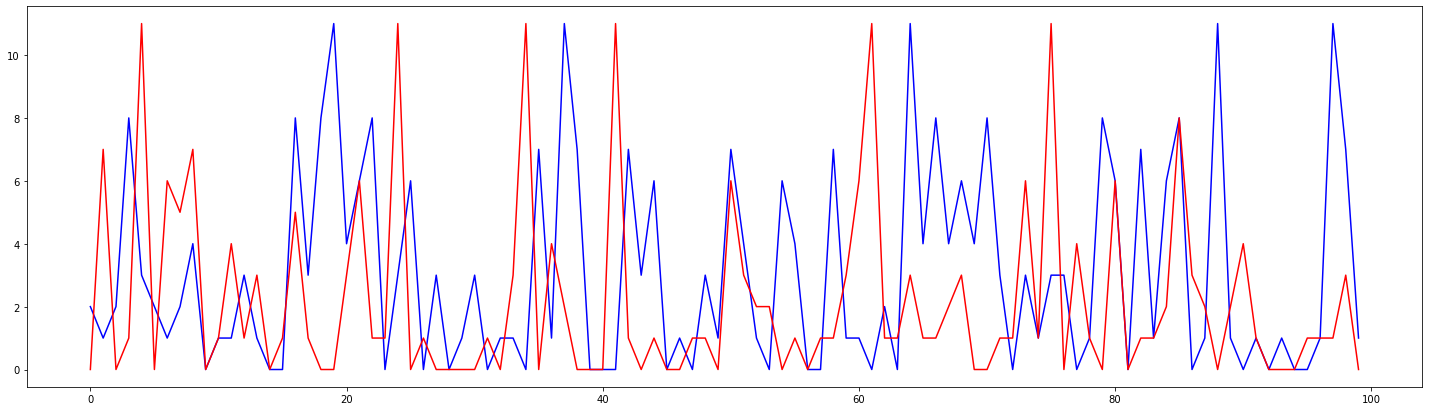

In [77]:
plt.figure(figsize = (25,7))
plt.plot(range(100),y_train[100:200],color='b')
plt.plot(range(100),y_pred[100:200],color='r')
plt.show()

In [73]:
sc = preprocessing.StandardScaler() 
sc.fit(X_train) 
X_train_std = sc.transform(X_train) 
X_test_std = sc.transform(X_test) 

In [85]:
X.shape

(1000001, 96)

In [86]:
Y.shape

(1000001,)

In [ ]:
sc_data_test = StandardScaler()
data_test = sc_data_test.fit_transform(data_test)

In [74]:
gnb = GaussianNB()
gnb.fit(X_train_std,y_train)
y_pred = gnb.predict(data_test)
print("Predicted Value:", y_pred)

Predicted Value: [0. 8. 6. ... 1. 1. 1.]


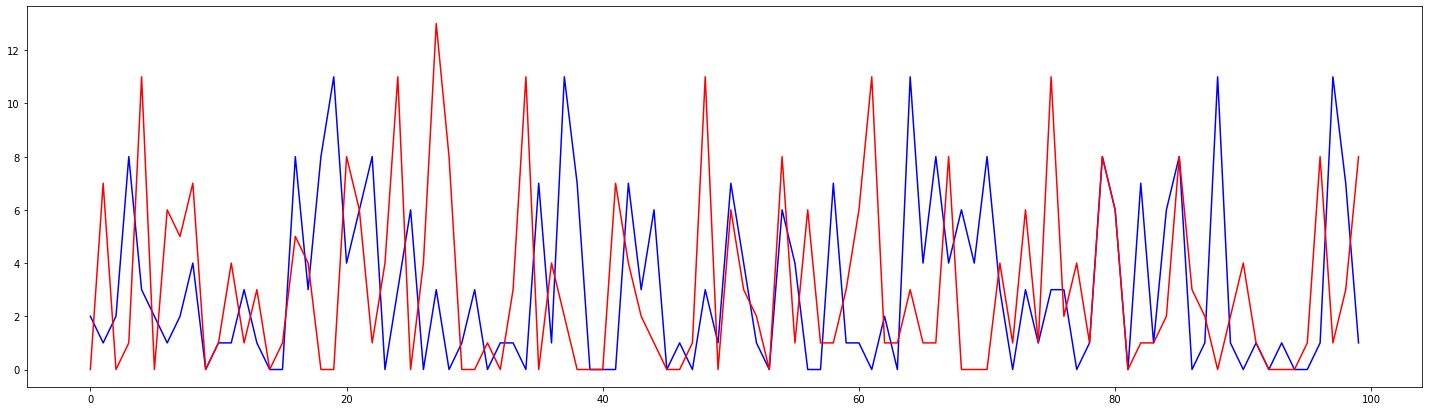

In [88]:
plt.figure(figsize = (25,7))
plt.plot(range(100),y_train[100:200],color='b')
plt.plot(range(100),y_pred[100:200],color='r')
plt.show()

# CATBOOST demonstration

In [2]:
!pip install catboost

In [ ]:
#demonstration on september csv only
data_train1 = pd.read_csv(f'D:/Master/II godina/Large Scale Data Mining/Projekat/Data/train data/20210926.csv')
data_labels = pd.read_csv(f'D:/Master/II godina/Large Scale Data Mining/Projekat/Data/train data/train_data_labells.csv')

data_all_train = data_train1.merge(data_labels, how='left', on='Id')
data_all_train=data_all_train.drop(data_all_train.columns[0], axis=1)
data_all_train=data_all_train.drop(data_all_train.columns[-1], axis=1)

data_test = data_test1.merge(data_test2, how='left', on='Id')
data_test=data_test.drop(data_test.columns[0], axis=1)

In [6]:
X = data_all_train.drop(["classId"], axis = 1)
Y = data_all_train["classId"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 42, test_size = 0.25)

In [7]:
model = CatBoostClassifier(
    custom_loss=[metrics.Accuracy()],
    random_seed=42,
    logging_level='Silent'
)

In [9]:
model.fit(
    X_train, y_train,
    categorical_features_indices,
    eval_set=(X, Y),
    plot=True
);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [115]:
y_pred = model.predict(data_test)

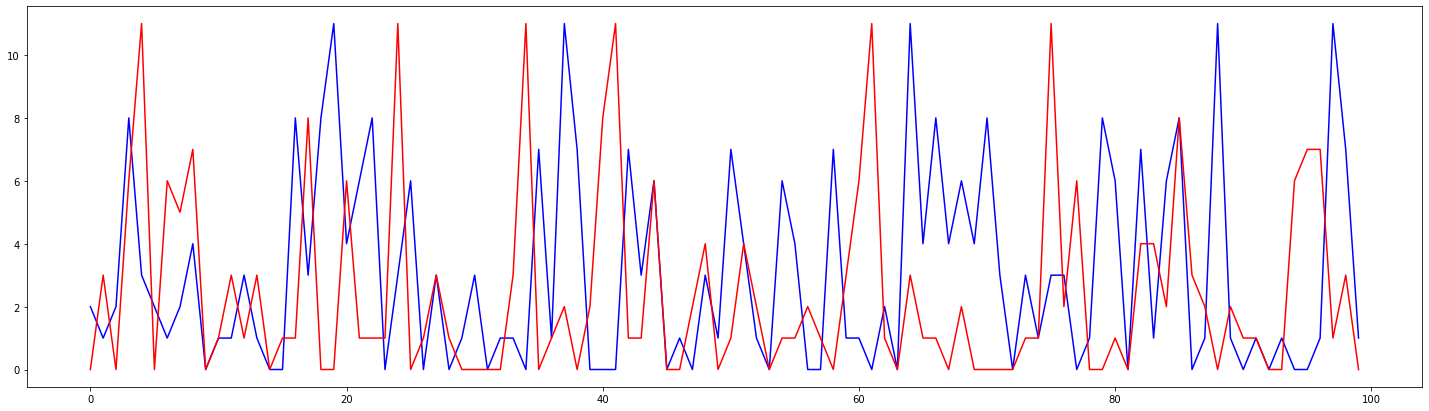

In [116]:
plt.figure(figsize = (25,7))
plt.plot(range(100),y_train[100:200],color='b')
plt.plot(range(100),y_pred[100:200],color='r')
plt.show()

In [130]:
solution = pd.read_csv(f'D:/Master/II godina/Large Scale Data Mining/Projekat/Data/solution_file_empty.csv')

In [131]:
solution['classId'] = y_pred

In [132]:
solution['classId'] = solution['classId'].astype(int)
solution['Id'] = solution['Id'].astype(int)

In [134]:
solution.to_csv(f'D:/Master/II godina/Large Scale Data Mining/Projekat/Data/catboostall.csv', index = False)

# DEEP LEARNING: Dense, CNN and MLP

In [ ]:
data_train1 = pd.read_csv(f'D:/Master/II godina/Large Scale Data Mining/Projekat/Data/train data/20210926.csv')
data_train2 = pd.read_csv(f'D:/Master/II godina/Large Scale Data Mining/Projekat/Data/train data/20210807.csv')
data_train3 = pd.read_csv(f'D:/Master/II godina/Large Scale Data Mining/Projekat/Data/train data/20210708.csv')
data_train4 = pd.read_csv(f'D:/Master/II godina/Large Scale Data Mining/Projekat/Data/train data/20210509.csv')
data_train5 = pd.read_csv(f'D:/Master/II godina/Large Scale Data Mining/Projekat/Data/train data/20210223.csv')
data_train6 = pd.read_csv(f'D:/Master/II godina/Large Scale Data Mining/Projekat/Data/train data/20210409.csv')
data_train7 = pd.read_csv(f'D:/Master/II godina/Large Scale Data Mining/Projekat/Data/train data/20210424.csv')
data_train8 = pd.read_csv(f'D:/Master/II godina/Large Scale Data Mining/Projekat/Data/train data/20210504.csv')

data_labels = pd.read_csv(f'D:/Master/II godina/Large Scale Data Mining/Projekat/Data/train data/train_data_labells.csv')

In [ ]:
data_all_train = data_train1.merge(data_train2, how='left', on='Id')
data_all_train = data_all_train.merge(data_train3, how='left', on='Id')
data_all_train = data_all_train.merge(data_train4, how='left', on='Id')
data_all_train = data_all_train.merge(data_train5, how='left', on='Id')
data_all_train = data_all_train.merge(data_train6, how='left', on='Id')
data_all_train = data_all_train.merge(data_train7, how='left', on='Id')
data_all_train = data_all_train.merge(data_train8, how='left', on='Id')
data_all_train = data_all_train.merge(data_labels, how='left', on='Id')

In [ ]:
data_all_train = data_all_train.drop(data_all_train.columns[0], axis=1)
data_all_train = data_all_train.drop(data_all_train.columns[-1], axis=1)

In [ ]:
data_test1 = pd.read_csv(f'D:/Master/II godina/Large Scale Data Mining/Projekat/Data/test data/20210926.csv')
data_test2 = pd.read_csv(f'D:/Master/II godina/Large Scale Data Mining/Projekat/Data/test data/20210807.csv')
data_test3 = pd.read_csv(f'D:/Master/II godina/Large Scale Data Mining/Projekat/Data/test data/20210708.csv')
data_test4 = pd.read_csv(f'D:/Master/II godina/Large Scale Data Mining/Projekat/Data/test data/20210509.csv')
data_test5 = pd.read_csv(f'D:/Master/II godina/Large Scale Data Mining/Projekat/Data/test data/20210223.csv')
data_test6 = pd.read_csv(f'D:/Master/II godina/Large Scale Data Mining/Projekat/Data/test data/20210409.csv')
data_test7 = pd.read_csv(f'D:/Master/II godina/Large Scale Data Mining/Projekat/Data/test data/20210424.csv')
data_test8 = pd.read_csv(f'D:/Master/II godina/Large Scale Data Mining/Projekat/Data/test data/20210504.csv')

In [ ]:
data_test = data_test1.merge(data_test2, how='left', on='Id')
data_test = data_test.merge(data_test3, how='left', on='Id')
data_test = data_test.merge(data_test4, how='left', on='Id')
data_test = data_test.merge(data_test5, how='left', on='Id')
data_test = data_test.merge(data_test6, how='left', on='Id')
data_test = data_test.merge(data_test7, how='left', on='Id')
data_test = data_test.merge(data_test8, how='left', on='Id')

In [ ]:
data_test = data_test.drop(data_test.columns[0], axis=1)

In [ ]:
X = data_all_train.drop(["classId"], axis = 1)
Y = data_all_train["classId"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 42, test_size = 0.25)

In [ ]:
scaler = preprocessing.MinMaxScaler()
names = data_all_train.columns
d = scaler.fit_transform(data_all_train)
scaled_data_all_train = pd.DataFrame(d, columns=names)

In [ ]:
scaler = preprocessing.MinMaxScaler()
names2 = data_test.columns
d2 = scaler.fit_transform(data_test)
scaled_data_test = pd.DataFrame(d2, columns=names2)

In [ ]:
X = tf.cast(X,tf.float32)

In [ ]:
#How I startted to build a model

model = Sequential()

model.add(Dense(69, activation='relu'))
print(model.output_shape)

model.add(Dense(14, activation='softmax'))
print(model.output_shape)


model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
model.summary()

In [ ]:
model = Sequential()
#kaggle 83%
model.add(Conv1D(kernel_size = 3, strides = 1, filters = 15, input_shape=(X_train.shape[1],1), activation='relu', padding = 'same'))

print(model.input_shape)
print(model.output_shape)

model.add(Dropout(0.3))

model.add(Flatten())
print(model.output_shape)

model.add(Dense(69, activation='relu'))
print(model.output_shape)

model.add(Dropout(0.2))

model.add(Dense(14, activation='softmax'))
print(model.output_shape)



model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
model.summary()

In [ ]:
model = Sequential()
#kaggle 84% 

model.add(Conv1D(kernel_size = 3, strides = 1, filters = 15, input_shape=(X_train.shape[1],1), activation='relu', padding = 'same'))

print(model.input_shape)
print(model.output_shape)

model.add(BatchNormalization()) #add
model.add(Dropout(0.3))

model.add(Flatten())
print(model.output_shape)

model.add(Dense(73, activation='relu'))
print(model.output_shape)

model.add(Dropout(0.3))

model.add(Dense(59, activation='relu'))
print(model.output_shape)

model.add(Dropout(0.2))

model.add(Dense(14, activation='softmax'))
print(model.output_shape)



model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
model.summary()

In [ ]:
model = Sequential()
#kaggle 88.2%

model.add(Conv1D(kernel_size = 3, strides = 1, filters = 17, input_shape=(X_train.shape[1],1), activation='relu', padding = 'same'))

print(model.input_shape)
print(model.output_shape)

model.add(MaxPooling1D(pool_size = (2), strides=(2))) #add
print(model.output_shape)

model.add(BatchNormalization())
model.add(Dropout(0.3)) 

model.add(Flatten())
print(model.output_shape)

model.add(Dense(73, activation='relu'))
print(model.output_shape)

model.add(Dropout(0.3))

model.add(Dense(36, activation='relu'))
print(model.output_shape)

model.add(Dropout(0.2))

model.add(Dense(14, activation='softmax'))
print(model.output_shape)



model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
model.summary()

In [ ]:
model.fit(X_train, y_train, epochs=43, batch_size=100)

In [ ]:
score = model.evaluate(X_test, y_test, batch_size=100)
print("\n%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

In [ ]:
plt.figure(figsize = (25,7))
plt.plot(range(100),y_train[100:200],color='b')
plt.plot(range(100),y_pred[100:200],color='r')
plt.show() 

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp_clf = MLPClassifier(hidden_layer_sizes=(150,100,50),
                        max_iter = 100,activation = 'relu',
                        solver = 'adam')

mlp_clf.fit(X_train, y_train) #81%

In [ ]:
y_pred = mlp_clf.predict(data_test)

In [ ]:
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100, 150],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [ ]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(mlp_clf, param_grid, n_jobs= -1, cv=5)
grid.fit(X_train, y_train)

print(grid.best_params_)

In [ ]:
grid_predictions = grid.predict(data_test) 

In [ ]:
solution = pd.read_csv(f'D:/Master/II godina/Large Scale Data Mining/Projekat/Data/solution_file_empty.csv')

classes = np.argmax(y_pred,axis=1)

solution['classId'] = classes

solution['classId'] = solution['classId'].astype(int)
solution['Id'] = solution['Id'].astype(int)

solution.to_csv(f'D:/Master/II godina/Large Scale Data Mining/Projekat/Data/FINAL.csv', index = False)